# Customer Churn com Spark

Este projeto tem o objetivo de prever o custumer churn ou rotatividade de clientes em uma determinada empresa Operadora de Telecom. 

O Customer Churn refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial e também à perda de clientes. A fidelidade do cliente e a rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da receita. Portanto, é muito importante prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente.

Para iniciar o projeto precisamos primeiro ler carregar as bibliotecas básicas do python.

In [1]:
#Bibliotecas para ler o dataframe e manipular os dados.
import pandas as pd
import numpy as np

#Bibliotecas para construir gráficos em Python.
import matplotlib.pyplot as plt
import seaborn as sns

Agora vamos carregar o dataset.

In [2]:
# Permite ver todas as colunas e linhas do dataframe
pd.set_option('display.max_columns', None)
# Carregando o dataset
df = pd.read_csv("projeto4_telecom_treino.csv")
# Visualizando as 5 primeras linhas do dataset.
df.head()

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    KS             128  area_code_415                 no   
1           2    OH             107  area_code_415                 no   
2           3    NJ             137  area_code_415                 no   
3           4    OH              84  area_code_408                yes   
4           5    OK              75  area_code_415                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls churn  
0                              1    no  
1                              1    no  
2                              0    no  
3                              2    no  
4                              3    no

In [3]:
# Vizualizando o número de linhas e colunas do dataset.
df.shape

(3333, 21)

Para começar nossa análise dos dados vamos verificar primeiro se existem valores nulos no dataset. Para isso irei usar a função isna(), que seleciona todos os valores NA de cada linha e sum() que soma os valores NA encontrados.

In [4]:
df.isna().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Como podemos ver não existem valores NA em nosso dataset, portanto não precisamos excluir ou mudar algum valor por este motivo.

# Análise Explroatória

Vamos começar nossa análise exploratória com a coluna "Unnamed: 0". Aparentemente ela parece ser apenas Id's de números em sequência. Se esse for o caso ela será excluída do nosso modelo, pois não irá representar nada a ele.

Para ter certeza se essa feature contem apenas números sequenciais vou ler os valores únicos dela, colocar em uma lista e depois verificar o tamanho da lista. Se a lista tiver o mesmo tamanho da quantidade de linhas, significa que ela não possui valores repetidos e portanto não fará diferença para o modelo.

In [5]:
unnamed = df['Unnamed: 0'].unique()
len(unnamed)

3333

In [6]:
# Permite visualizar as 5 últimas linhas do dataset
df.tail()

Unnamed: 0 state  account_length      area_code international_plan  \
3328        3329    AZ             192  area_code_415                 no   
3329        3330    WV              68  area_code_415                 no   
3330        3331    RI              28  area_code_510                 no   
3331        3332    CT             184  area_code_510                yes   
3332        3333    TN              74  area_code_415                 no   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
3328               77             26.55              215.5              126   
3329               57             39.29              153.4               55   
3330              109             30.74              288.8               58   
3331              105             36.35              159.6               84   
3332              113             39.85              265.9               82   

      total_eve_charge  total_night_minutes  total_night_calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total_night_charge  total_intl_minutes  total_intl_calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total_intl_charge  number_customer_service_calls churn  
3328               2.67                              2    no  
3329               2.59                              3    no  
3330               3.81                              2    no  
3331               1.35                              2    no  
3332               3.70                              0    no

Como eu suspeitava essa feature possui apenas valores em sequência, portanto a mesma será excluída de meu dataset.

In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

Agora iremos analizar a variável target "churn" que basicamente significa a tomada de descisão, positiva ou negativa, do cliente sair ou não da carteira da empresa. Vamos ver quantos valores positivos e negativos nosso dataset tem.

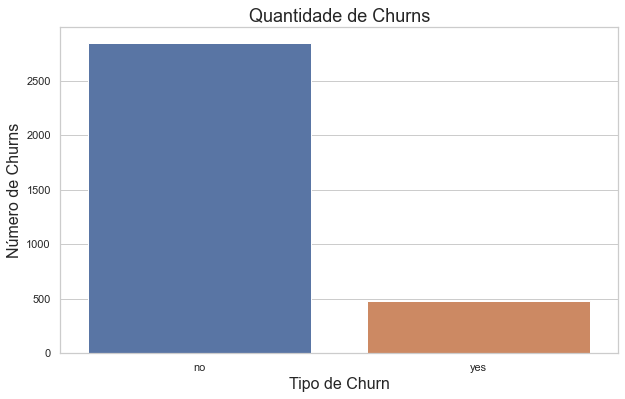

In [8]:
#Gerando o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.churn, data=df)
ax.xaxis.set_label_text("Tipo de Churn",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Churns", fontdict={'size':16})
ax.set_title("Quantidade de Churns", fontdict={'size':18})
plt.show()

Como podemos ver em nossa variável target, a maioria dos clientes não tem a pretenção de abandonar o serviço, mas para a empresa o foco é naqueles clientes que estão pensando em abandonar e oferecer algo para tentar fazê-lo desistir da ideia, portanto uma ferramenta que pode ser útil na realização do modelo preditivo é o balanceamento do dataset, evitando assim um grande número de falsos positivos.

Agora vamos começar a analizar as variáveis qualitativas do dataset, começando pela coluna "state"

É interessante saber quantos estados diferentes temos em nosso dataset e como eles estão divididos proporcionalmente. Para iremos fazer um gráfico para poder visualizar de forma mais clara.

O dataset possui 51 estados diferentes


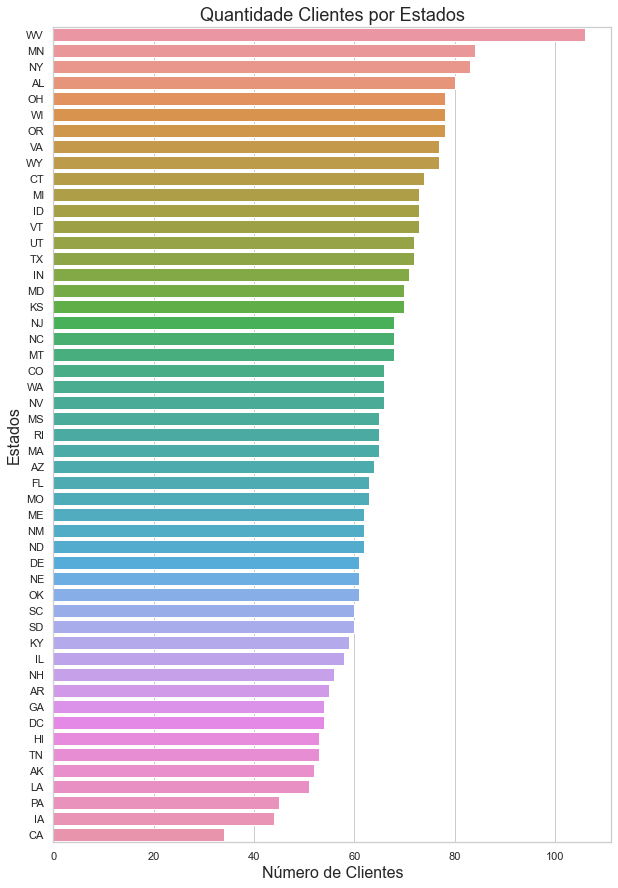

In [9]:
# Calculando o número de estados diferentes.
states = len(df.state.unique())
print("O dataset possui {} estados diferentes" .format(states))
#Gerando o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10,15))

ax = sns.countplot(y=df.state, order = df.state.value_counts().index)
ax.xaxis.set_label_text("Número de Clientes",fontdict= {'size':16})
ax.yaxis.set_label_text("Estados", fontdict={'size':16})
ax.set_title("Quantidade Clientes por Estados", fontdict={'size':18})
plt.show()

Podemos perceber que nosso dataset possui muitos estados diferentes, isso pode deixar o modelo um pouco lento. Outro ponto interessante para ver nessa feature é a quantidade de clientes por estados que irão continuar ou não com o serviço.

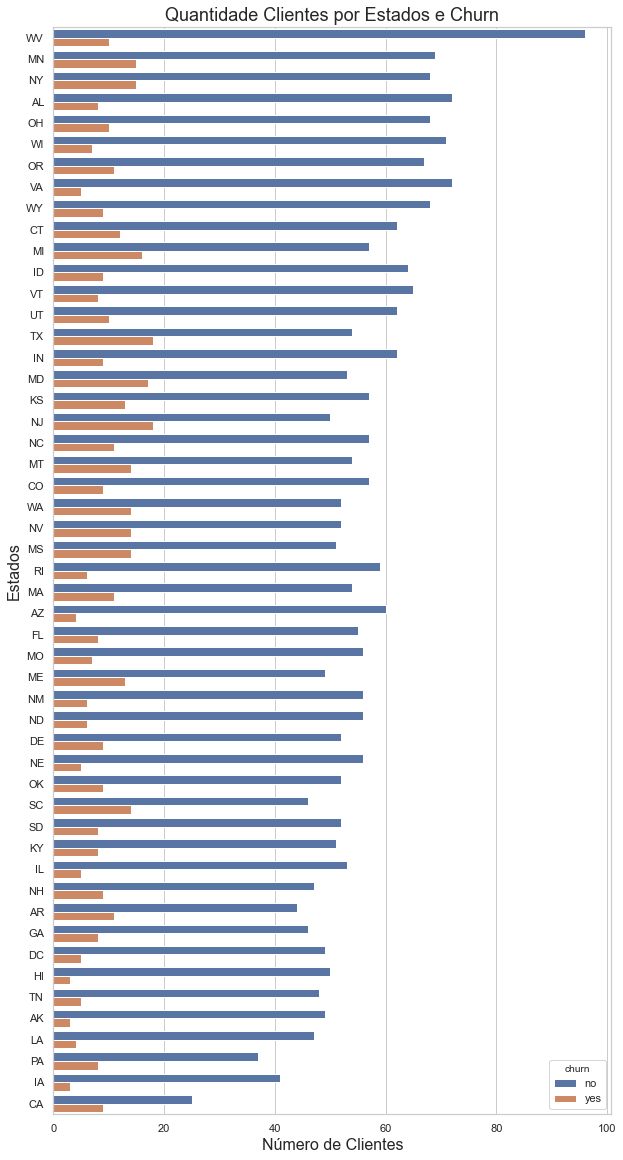

In [10]:
#Gerando o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10,20))

ax = sns.countplot(y=df.state, hue=df.churn, order = df.state.value_counts().index)
ax.xaxis.set_label_text("Número de Clientes",fontdict= {'size':16})
ax.yaxis.set_label_text("Estados", fontdict={'size':16})
ax.set_title("Quantidade Clientes por Estados e Churn", fontdict={'size':18})
plt.show()

Podemos ver que em alguns estados a taxa de cancelamentos são menores do que em outros, como no estado 'WW'onde os números de 'não's são maiores do que os outros, mas os 'sim's são menores do que os segundo e terceiro estados abaixo dele.

Visto isso vamos criar uma nova coluna em nosso dataset que terá a porcetagem de 'sim's em cada estado essa coluna servirá de base para nossa predição.

In [11]:
# criando a nova feature
states_churn = df.groupby(['state', 'churn']).agg({'churn': 'count'})
state_pcts = states_churn.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
states_pcts_yes = state_pcts.filter(like='yes', axis=0)
states_pcts_yes = states_pcts_yes.reset_index(0).reset_index(drop=True)
states_pcts_yes = states_pcts_yes.set_index('state')
states_pcts_yes
states = states_pcts_yes.to_dict()
states = states["churn"]
states

{'AK': 5.769230769230769,
 'AL': 10.0,
 'AR': 20.0,
 'AZ': 6.25,
 'CA': 26.470588235294116,
 'CO': 13.636363636363637,
 'CT': 16.216216216216218,
 'DC': 9.25925925925926,
 'DE': 14.754098360655737,
 'FL': 12.698412698412698,
 'GA': 14.814814814814815,
 'HI': 5.660377358490566,
 'IA': 6.818181818181818,
 'ID': 12.32876712328767,
 'IL': 8.620689655172415,
 'IN': 12.67605633802817,
 'KS': 18.571428571428573,
 'KY': 13.559322033898304,
 'LA': 7.8431372549019605,
 'MA': 16.923076923076923,
 'MD': 24.285714285714285,
 'ME': 20.967741935483872,
 'MI': 21.91780821917808,
 'MN': 17.857142857142858,
 'MO': 11.11111111111111,
 'MS': 21.53846153846154,
 'MT': 20.58823529411765,
 'NC': 16.176470588235293,
 'ND': 9.67741935483871,
 'NE': 8.19672131147541,
 'NH': 16.071428571428573,
 'NJ': 26.470588235294116,
 'NM': 9.67741935483871,
 'NV': 21.21212121212121,
 'NY': 18.072289156626507,
 'OH': 12.820512820512821,
 'OK': 14.754098360655737,
 'OR': 14.102564102564102,
 'PA': 17.77777777777778,
 'RI': 9.

In [12]:
df['Perct_state'] = round(df['state'].map(states),2)
df.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    KS             128  area_code_415                 no             yes   
1    OH             107  area_code_415                 no             yes   
2    NJ             137  area_code_415                 no              no   
3    OH              84  area_code_408                yes              no   
4    OK              75  area_code_415                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls churn  Perct_state  
0                              1    no        18.57  
1                              1    no        12.82  
2                              0    no        26.47  
3                              2    no        12.82  
4                              3    no        14.75

Agora vamos analisar a feature "area_code". Que indica a código de área de onde o serviço é prestado. A análise é parecida com a análise acima.

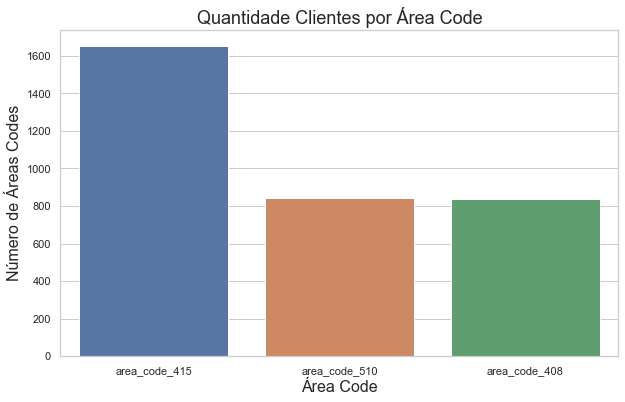

In [13]:
#Gerando o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.area_code, order = df.area_code.value_counts().index)
ax.xaxis.set_label_text("Área Code",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Áreas Codes", fontdict={'size':16})
ax.set_title("Quantidade Clientes por Área Code", fontdict={'size':18})
plt.show()

Temos 3 tipos de "area_code" onde o código 415 tem mais clientes e os outros dois tem uma quantidade bem parecida. Vamos comparar essa variável com a variável churn.

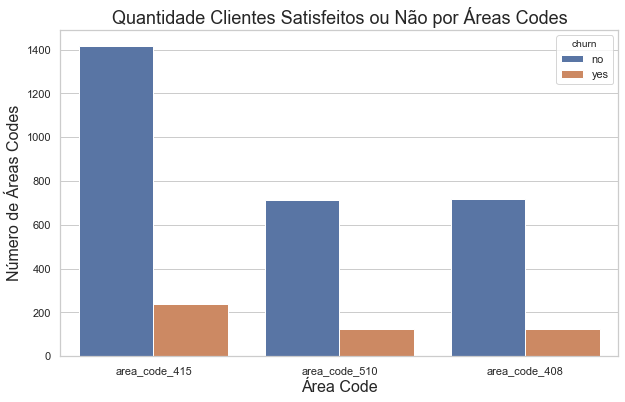

In [14]:
#Gerando o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.area_code, hue=df.churn, order = df.area_code.value_counts().index)
ax.xaxis.set_label_text("Área Code",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Áreas Codes", fontdict={'size':16})
ax.set_title("Quantidade Clientes Satisfeitos ou Não por Áreas Codes", fontdict={'size':18})
plt.show()

Visualmente a coluna 'area_code' não aprenta ter uma relação muito direta com a variável target, mas mesmo assim acredito ser um fator relevante juntamente com outras colunas.

Vamos analisar agora a feature "international_plan" que mostra qual o tipo de plano do cliente.

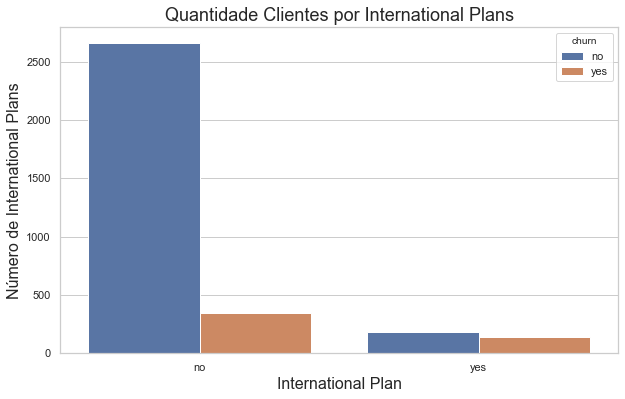

In [15]:
#Gerando o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.international_plan, hue=df.churn, order = df.international_plan.value_counts().index)
ax.xaxis.set_label_text("International Plan",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de International Plans", fontdict={'size':16})
ax.set_title("Quantidade Clientes por International Plans", fontdict={'size':18})
plt.show()

Podemos perceber pelo gráfico que aqueles que não têm plano internacional não costumam cancelar o plano comparado àqueles que possuem. Um dos motivos pode estar ligado ao valor alto cobrado em planos internacionais.

A última feature qualitativa a ser analizada é a "voice_mail_plan".

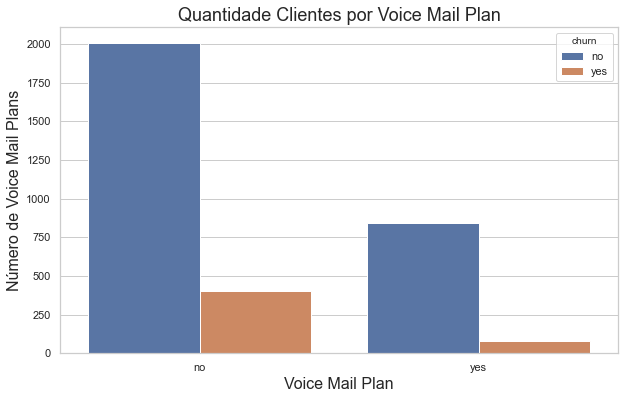

In [16]:
#Gerando o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.voice_mail_plan, hue=df.churn, order = df.voice_mail_plan.value_counts().index)
ax.xaxis.set_label_text("Voice Mail Plan",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Voice Mail Plans", fontdict={'size':16})
ax.set_title("Quantidade Clientes por Voice Mail Plan", fontdict={'size':18})
plt.show()

Esta variável não parece influenciar tanto na decisão quanto a anterior, mas também manterei para o primeiro modelo para ver qual será o resultado.

Agora iremos análizar as variáveis quantitativas do dataset. Para começar nossa análise iremos utilizar o pairplot que mostra qual a relação entre todas as variáveis uma a uma.

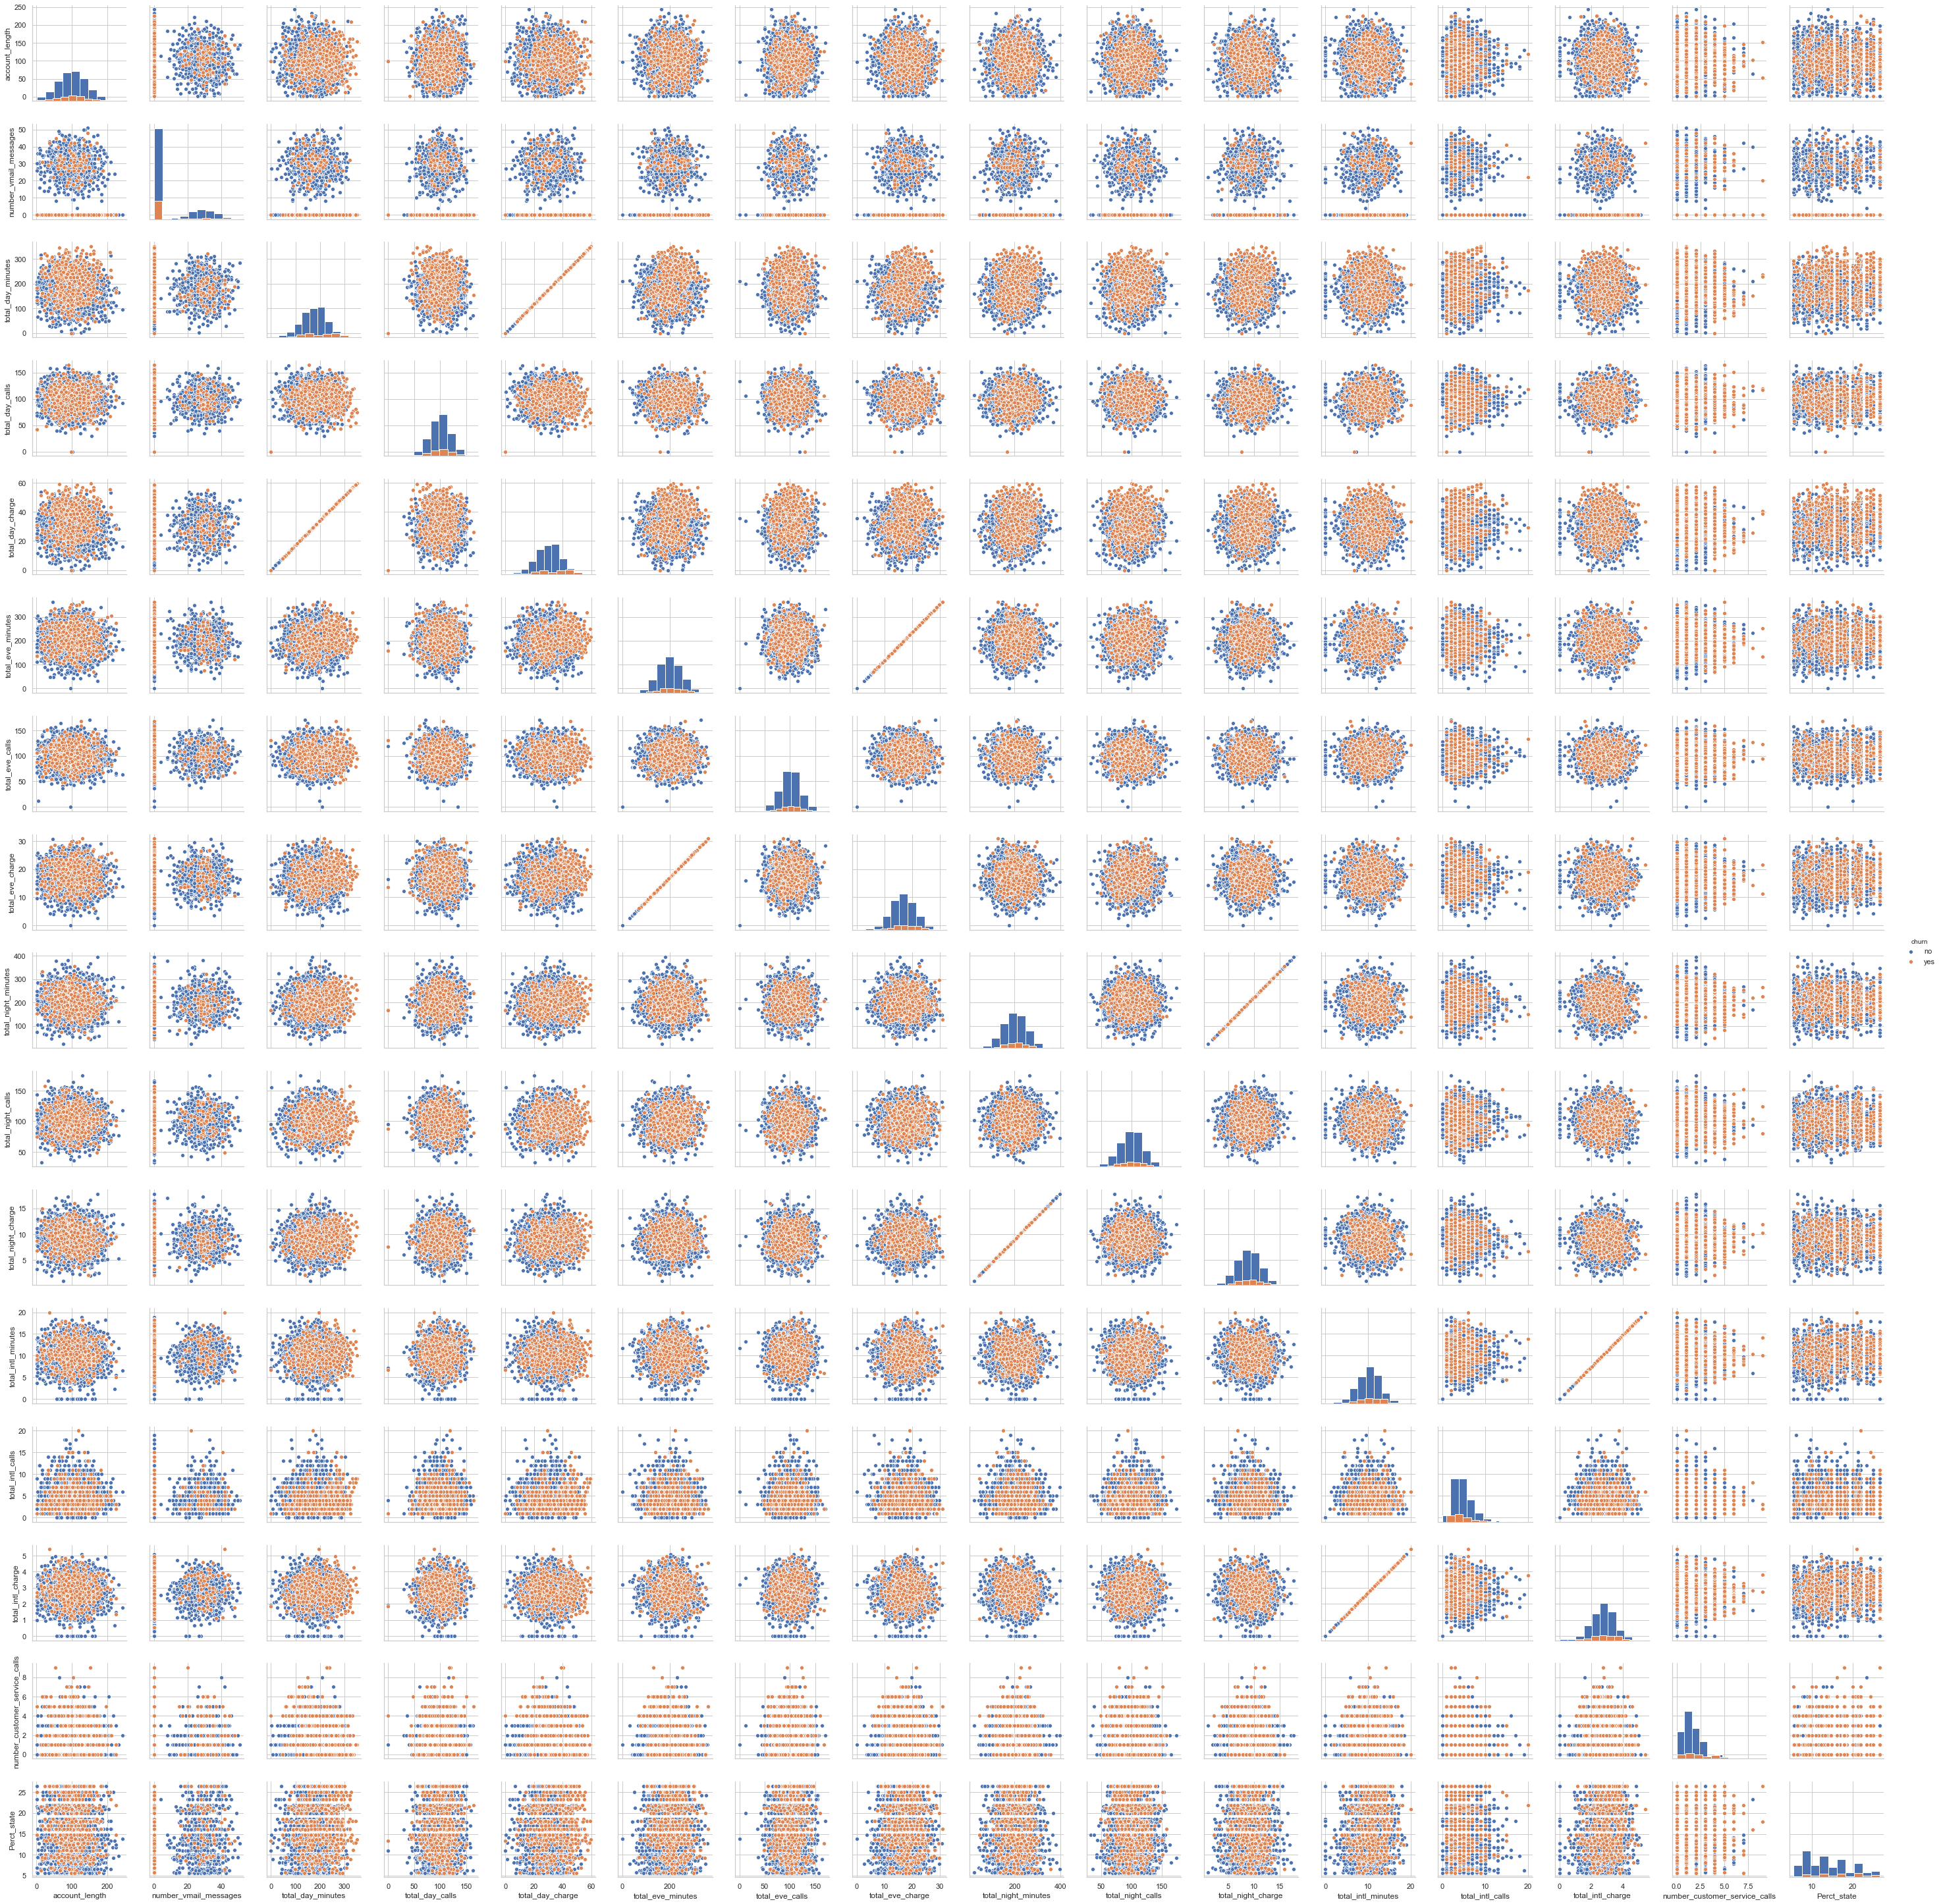

In [17]:
#Gerando o gráfico
sns.pairplot(df, hue="churn", diag_kind="hist")
plt.show()

O gráfico não ficou muito bom para visualizar, mas conseguimos extrair algumas coisas dele. Primeiramente podemos ver na diagonal os histogramas, onde podemos perceber que a maioria dos gráficos apresentam uma distribuição normal. Isso é muito bom para o modelo. Também podemos ver em alguns gráficos de disperção que existe apenas uma linha na diagonal. Isso pode significar que a correlação entre eles é muito alta e isso pode atrapalhar na tomada de decisão do modelo,  deixando-o instável. Portanto uma dessas variáveis terão que ser excluídas. Podemos ver também que, na segunda variável quantitativa ("number_vmail_messages"), o número de zeros é muito alto, precisamos verificar se isso é um fato normal ou alguma anormalidade nessa feature.

Outro gráfico que ajuda a visualização e o entedimento de nossa análize é o heatmap, ou mapa de calor, que irá mostrar a correlação entre as variáveis.

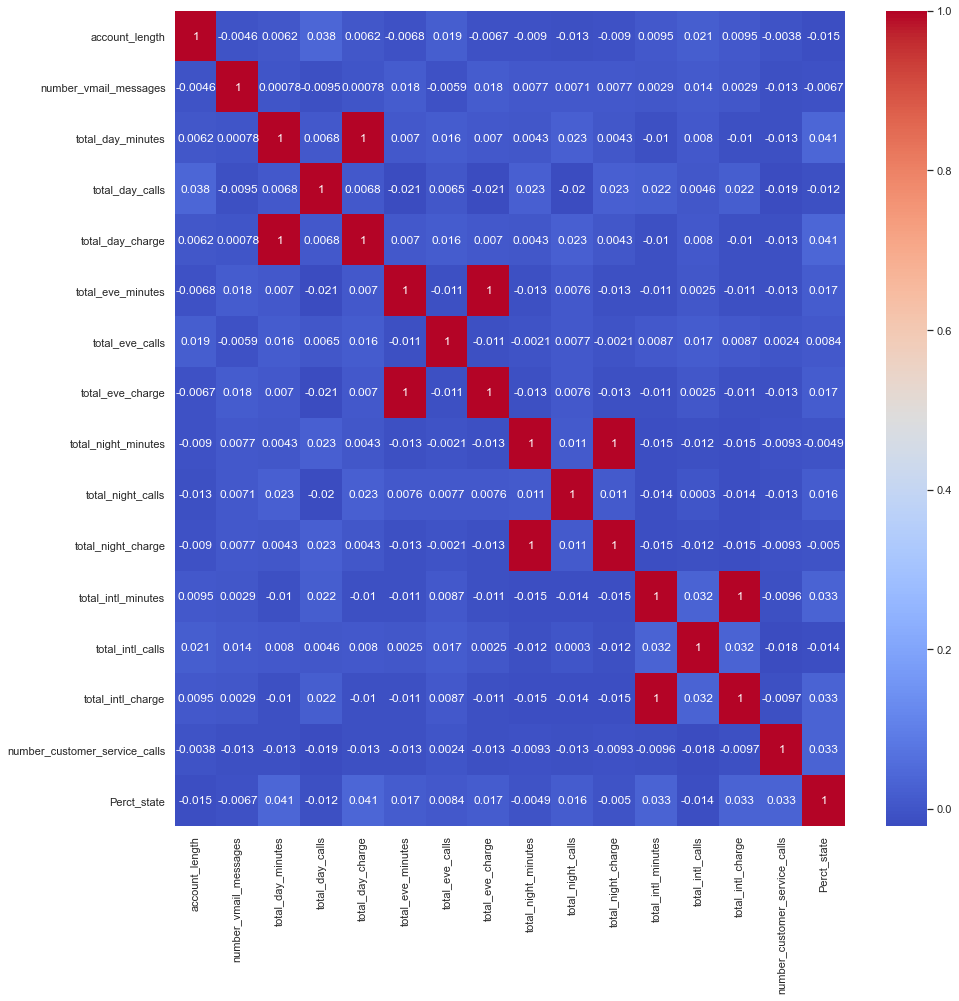

In [18]:
# Calculando a correlação
df_corr = df.corr()
# Criando o gráfico heatmap
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, cmap='coolwarm', annot=True)
plt.show()

Conforme foi citado acima, as variáveis "total_day_minutes" e "total_day_charge" tem uma correlação igual a 1 e portanto teremos que excluir uma das duas para que o modelo não sofra com problemas de estabilidade. O mesmo problema também acoontece com as variáveis "total_eve_minutes" e "total_eve_charge", "total_night_minutes" e "total_night_charge" e "total_intl_minutes" e "total_intl_charge".

Agora vamos gerar os boxplots de cada feature dividos pela decisão do cliente continuar ou não com os serviços. Esse gráficos serão importantes para verificar se o dataset possui valores outliers.

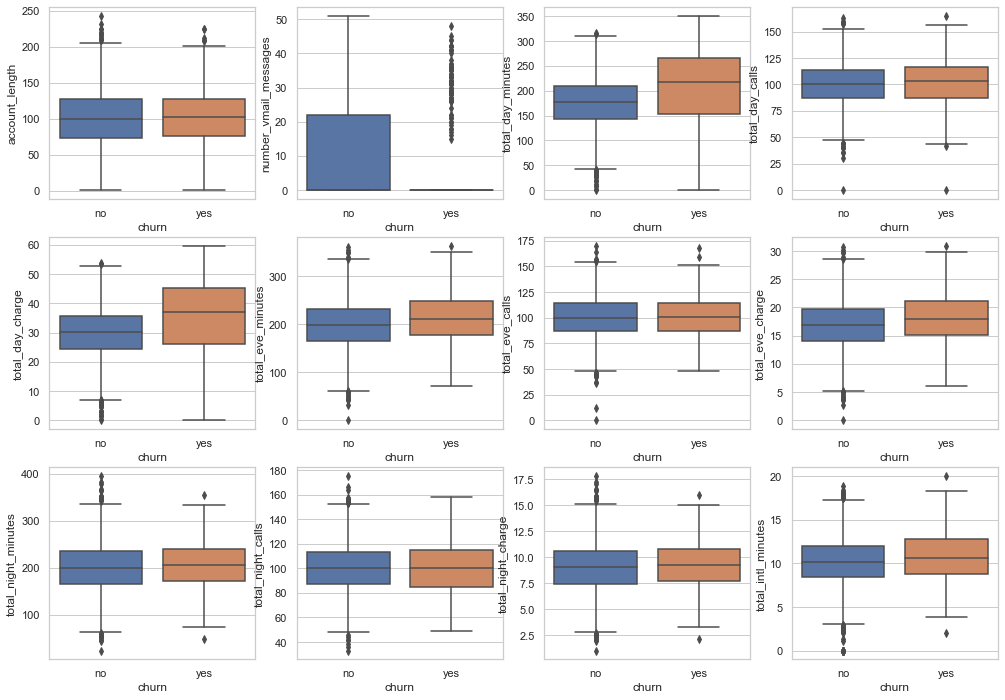

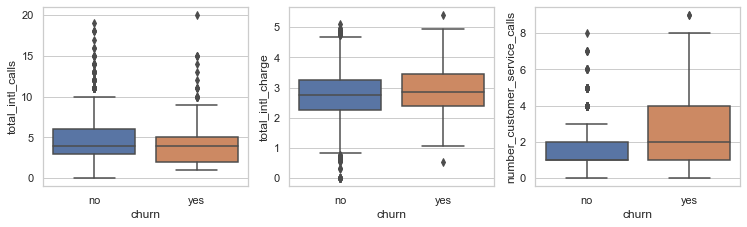

In [19]:
fig, ax = plt.subplots(3,4,figsize=(17, 12))
sns.boxplot(y=df.account_length, x=df.churn, ax=ax[0][0])
sns.boxplot(y=df.number_vmail_messages, x=df.churn, ax=ax[0][1])
sns.boxplot(y=df.total_day_minutes, x=df.churn, ax=ax[0][2])
sns.boxplot(y=df.total_day_calls, x=df.churn, ax=ax[0][3])

sns.boxplot(y=df.total_day_charge, x=df.churn, ax=ax[1][0])
sns.boxplot(y=df.total_eve_minutes, x=df.churn, ax=ax[1][1])
sns.boxplot(y=df.total_eve_calls, x=df.churn, ax=ax[1][2])
sns.boxplot(y=df.total_eve_charge, x=df.churn, ax=ax[1][3])

sns.boxplot(y=df.total_night_minutes, x=df.churn, ax=ax[2][0])
sns.boxplot(y=df.total_night_calls, x=df.churn, ax=ax[2][1])
sns.boxplot(y=df.total_night_charge, x=df.churn, ax=ax[2][2])
sns.boxplot(y=df.total_intl_minutes, x=df.churn, ax=ax[2][3])
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12.5, 3.3))
sns.boxplot(y=df.total_intl_calls, x=df.churn, ax=ax1)
sns.boxplot(y=df.total_intl_charge, x=df.churn, ax=ax2)
sns.boxplot(y=df.number_customer_service_calls, x=df.churn, ax=ax3)
plt.show()

Visualizando cada gráfico podemos ver que cada um deles possuem alguns outliers, mas inicialmente decidi mantê-los para o primeiro modelo preditivo, pois acredito que eles não irão interferir nos cálculos.

Outro fato interessante que podemos ver pelos gráficos é que a variável "number_vmail_messages", que possui muitos valores iguais a zero, quando dividido pela feature churn temos que a maioria dos clientes que decidem fazer o cancelamento do serviço também utilizam pouco esse serviço em específico ("number_vmail_messages"). Portanto a quantidade grande de zeros pode ser um diferencial para a tomada de decisão do modelo que será gerado.

Vamos salvar este dataset modificado até o momento e continuar nossa análise utilizando o spark para fazer as modificações necessárias e rodas o algoritmos de machine learning.

In [20]:
df.to_csv('dfTrain.csv', header=True, index=False)

# Spark para limpeza dos dados

Para a utilizaçao do spark vamos inicialmente carregar as bibliotecas que serão utilizadas neste projeto.

In [21]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import PCA
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import pyspark.sql.functions as F

Agora vamos criar uma sessão que fará a conexão da máquina com o spark

In [22]:
# Criando o SparkSession
spSession = SparkSession.builder.master("local").appName("ChurnClients").getOrCreate()

Criada a conexão vamos ler o dataset salvo anteriormente em formato RDD. Resilient Distributed Datasets (RDD) é uma estrutura de dados fundamental do Spark. É uma coleção imutável de objetos distribuídos. Cada conjunto de dados em RDD é dividido em partições lógicas, que podem ser computadas em diferentes nós do cluster.

In [23]:
# Lendo o arquivo em formato RDD
dfRDD = sc.textFile('dfTrain.csv')

Agora vamos salvar o dataset na memória cache do computador, o que fará com que o programa rode com mais eficiência

In [24]:
dfRDD.cache()

dfTrain.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [25]:
# Contando o número de linhas do dataset (incluindo o cabeçalho)
dfRDD.count()

3334

In [26]:
# Lendo as primeiras 5 linhas do dataset
dfRDD.take(5)

['state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,Perct_state',
 'KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,no,18.57',
 'OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,no,12.82',
 'NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,no,26.47',
 'OH,84,area_code_408,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,12.82']

In [27]:
# Removendo o cabeçalho do arquivo
firstLine = dfRDD.first()
dfRDD2 = dfRDD.filter(lambda x: x != firstLine)
dfRDD2.count()

3333

Agora que o arquivo está lido e sem o cabeçalho vamos realizar as transformações necessárias para a execução do modelo preditivo. Para isso iremos criar uma função que irá transformar as features do tipo qualitativa no tipo quantitativa.

In [28]:
# Criando a função
def TransformaDados(inputStr) :
    attList = inputStr.replace("\"", "").split(",")
    
    Area_code_415 = 1.0 if attList[2] ==  "area_code_415" else 0.0
    Area_code_408 = 1.0 if attList[2] ==  "area_code_408" else 0.0
    Area_code_510 = 1.0 if attList[2] ==  "area_code_510" else 0.0
    International_plan = 1.0 if attList[3] ==  "yes" else 0.0
    Voice_mail_plan = 1.0 if attList[4] ==  "yes" else 0.0
    Churn = 1.0 if attList[19] ==  "yes" else 0.0
    
    # Cria a linha com os objetos transformados
    linhas = Row(state = attList[0], account_length = float(attList[1]), area_code_415 = Area_code_415, area_code_408 =
                Area_code_408, area_code_510 = Area_code_510, international_plan = International_plan, voice_mail_plan =
                Voice_mail_plan, number_vmail_messages = float(attList[5]), total_day_minutes = attList[6], total_day_calls =
                float(attList[7]), total_day_charge = attList[8], total_eve_minutes = attList[9], total_eve_calls =
                float(attList[10]), total_eve_charge = attList[11], total_night_minutes = attList[12], total_night_calls =
                float(attList[13]), total_night_charge = attList[14], total_intl_minutes = attList[15], total_intl_calls =
                float(attList[16]), total_intl_charge = attList[17], number_customer_service_calls = float(attList[18]),
                churn = Churn, Perct_state = attList[20])
    return(linhas)

In [29]:
# Lendo a função em um novo RDD
dfRDD3 = dfRDD2.map(TransformaDados)
dfRDD3.collect()[:5]

[Row(Perct_state='18.57', account_length=128.0, area_code_408=0.0, area_code_415=1.0, area_code_510=0.0, churn=0.0, international_plan=0.0, number_customer_service_calls=1.0, number_vmail_messages=25.0, state='KS', total_day_calls=110.0, total_day_charge='45.07', total_day_minutes='265.1', total_eve_calls=99.0, total_eve_charge='16.78', total_eve_minutes='197.4', total_intl_calls=3.0, total_intl_charge='2.7', total_intl_minutes='10.0', total_night_calls=91.0, total_night_charge='11.01', total_night_minutes='244.7', voice_mail_plan=1.0),
 Row(Perct_state='12.82', account_length=107.0, area_code_408=0.0, area_code_415=1.0, area_code_510=0.0, churn=0.0, international_plan=0.0, number_customer_service_calls=1.0, number_vmail_messages=26.0, state='OH', total_day_calls=123.0, total_day_charge='27.47', total_day_minutes='161.6', total_eve_calls=103.0, total_eve_charge='16.62', total_eve_minutes='195.5', total_intl_calls=3.0, total_intl_charge='3.7', total_intl_minutes='13.7', total_night_call

## Pré-processamento dos dados

Feitas essas tranformações vamos fazer o pré processamento dos dados selecionando as variáveis que irão ser utilizadas no modelo e tranformando o dataset em uma matriz com a variável target separada das outras variáveis, que ficarão em um vetor denso para cada linha. Também utilizaremos uma técnica para a redução de dimensionalidade de nossas variáveis, isso permitirá que o programa seja rodado de forma mais suave.

Como foi dito anteriormente, vamos excluir apenas aquelas variáveis que estavam causando o problema de alta correlação entre elas, o restante será mantido.

In [30]:
# Criando um LabeledPoint (target, Vector[features])
def transformVar(row) :
    obj = (row["churn"], Vectors.dense(row["account_length"], row["area_code_415"], row["area_code_408"],
                                     row["area_code_510"], row["international_plan"], row["voice_mail_plan"],
                                     row["number_vmail_messages"], row["total_day_minutes"], row["total_day_calls"],
                                     row["total_eve_minutes"], row["total_eve_calls"], row["total_night_minutes"],
                                     row["total_night_calls"], row["total_intl_minutes"], row["total_intl_calls"],
                                     row["number_customer_service_calls"], row["Perct_state"]))
    return obj

In [31]:
dfRDD4 = dfRDD3.map(transformVar)
dfRDD4.collect()

[(0.0,
  DenseVector([128.0, 1.0, 0.0, 0.0, 0.0, 1.0, 25.0, 265.1, 110.0, 197.4, 99.0, 244.7, 91.0, 10.0, 3.0, 1.0, 18.57])),
 (0.0,
  DenseVector([107.0, 1.0, 0.0, 0.0, 0.0, 1.0, 26.0, 161.6, 123.0, 195.5, 103.0, 254.4, 103.0, 13.7, 3.0, 1.0, 12.82])),
 (0.0,
  DenseVector([137.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 243.4, 114.0, 121.2, 110.0, 162.6, 104.0, 12.2, 5.0, 0.0, 26.47])),
 (0.0,
  DenseVector([84.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 299.4, 71.0, 61.9, 88.0, 196.9, 89.0, 6.6, 7.0, 2.0, 12.82])),
 (0.0,
  DenseVector([75.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 166.7, 113.0, 148.3, 122.0, 186.9, 121.0, 10.1, 3.0, 3.0, 14.75])),
 (0.0,
  DenseVector([118.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 223.4, 98.0, 220.6, 101.0, 203.9, 118.0, 6.3, 6.0, 0.0, 10.0])),
 (0.0,
  DenseVector([121.0, 0.0, 0.0, 1.0, 0.0, 1.0, 24.0, 218.2, 88.0, 348.5, 108.0, 212.6, 118.0, 7.5, 7.0, 3.0, 16.92])),
 (0.0,
  DenseVector([147.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 157.0, 79.0, 103.1, 94.0, 211.8, 96.0, 7.1, 6.0, 0.0, 11.11])),

In [32]:
# Transformando o RDD em um dataframe.
dfTrain = spSession.createDataFrame(dfRDD4, ["label", "features"])
dfTrain.select("features", "label").show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[128.0,1.0,0.0,0....|  0.0|
|[107.0,1.0,0.0,0....|  0.0|
|[137.0,1.0,0.0,0....|  0.0|
|[84.0,0.0,1.0,0.0...|  0.0|
|[75.0,1.0,0.0,0.0...|  0.0|
+--------------------+-----+
only showing top 5 rows



In [33]:
# Gerando a redução de dimensionalidade.
dfPCA = PCA(k = 5, inputCol = "features", outputCol = "pcaFeatures")
pcaModel = dfPCA.fit(dfTrain)
pcaResult = pcaModel.transform(dfTrain).select("label", "pcaFeatures")
pcaResult.show(truncate=False)

+-----+-------------------------------------------------------------------------------------------------+
|label|pcaFeatures                                                                                      |
+-----+-------------------------------------------------------------------------------------------------+
|0.0  |[-283.1321954921104,-8.831255249108578,298.1603313597033,136.05989821984184,84.24310074949314]   |
|0.0  |[-179.90959353739515,-14.573979225169166,310.1100565320442,116.58991562869525,93.87254186241942] |
|0.0  |[-256.1565228195028,-15.739649465010036,187.29785476588427,142.7202257867833,85.37303669792381]  |
|0.0  |[-309.2389414549588,-83.78808829484775,175.0272359666387,87.67354105518473,47.24755694718082]    |
|0.0  |[-181.07908898716482,-8.61617233534113,228.50052375200076,82.43052298849821,82.70747068922967]   |
|0.0  |[-241.6493532319047,35.8228556910689,283.45828147360646,125.63380018970287,66.15972569931708]    |
|0.0  |[-242.71117877989823,129.72898675163805

## Machine Learning

Agora que nosso dataset foi preparado vamos gerar o modelo de machine learning. Neste projeto iremos utilizar a Regressão Logistica como modelo de machine learning, conforme foi definido.

Para o cáculo do erro vamos utilizar a métrica AUC, pois ela contabiliza leva em consideração os falsos positivos, o que é importante para este caso em específico, onde o maior acerto que queremos ter é em relação aos clientes que pretendem sair da empresa, que são a minoria.

In [34]:
# Criando a divisão do dataset entre treino e teste
train, test = pcaResult.randomSplit([0.7, 0.3], seed=12345)
print("O número de linhas de dataset de treino é de {}" .format(train.count()))
print("O número de linhas de dataset de teste é de {}" .format(test.count()))

O número de linhas de dataset de treino é de 2300
O número de linhas de dataset de teste é de 1033


In [35]:
# Gerando o modelo.
lr = LogisticRegression(labelCol="label", featuresCol="pcaFeatures", maxIter=10)
model=lr.fit(train)
predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("label","prediction", "probability").show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.61255974008626...|
|  0.0|       0.0|[0.71009560766736...|
|  0.0|       0.0|[0.76501254613110...|
|  0.0|       0.0|[0.72097459267070...|
|  0.0|       0.0|[0.69129181440395...|
|  0.0|       0.0|[0.71242503502220...|
|  0.0|       0.0|[0.72918511129230...|
|  0.0|       0.0|[0.75100364008177...|
|  0.0|       0.0|[0.79871782886651...|
|  0.0|       0.0|[0.76853190533380...|
+-----+----------+--------------------+
only showing top 10 rows



In [36]:
# Medindo o erro do modelo utilizando a métrica AUC.
evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="label")
predict_test.select("label","rawPrediction","prediction","probability").show(5)

print("The area under ROC for train set is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set is {}".format(evaluator.evaluate(predict_test)))

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[0.45808480355365...|       0.0|[0.61255974008626...|
|  0.0|[0.89584843264415...|       0.0|[0.71009560766736...|
|  0.0|[1.18036010893639...|       0.0|[0.76501254613110...|
|  0.0|[0.94930105427821...|       0.0|[0.72097459267070...|
|  0.0|[0.80616559450467...|       0.0|[0.69129181440395...|
+-----+--------------------+----------+--------------------+
only showing top 5 rows

The area under ROC for train set is 0.6362159667743437
The area under ROC for test set is 0.6689691027926317


Em nosso primeiro teste conseguimos um resultado bom, mas vamos tentar melhorá-lo. Para isso iremos balancear nosso dataset, pois o mesmo possui muitos valores negativos em comparação aos positivos e isso pode causar um overfiting no modelo. Criando os falsos positivos.

In [37]:
dataset_size=float(pcaResult.select("label").count())
numPositives=train.select("label").where('label == 1').count()
per_ones=(float(numPositives)/float(dataset_size))*100
numNegatives=float(dataset_size-numPositives)
print('O número de positivos são {}'.format(numPositives))
print('A porcentagem de positivos são {}'.format(per_ones))

O número de positivos são 330
A porcentagem de positivos são 9.900990099009901


Como podemos perceber a taxa de números positivos é muito baixa, apenas 10% praticamente. Para nos ajudar, a técnica de Regressão Logística do spark tem uma função que balanceia de forma fácil o nosso dataset. Para isso precisamos apenas calcular o Balancing Ratio, ou taxa de balanceamento e de posivos e negativos e gerar uma coluna no dataset com esses valores.

In [38]:
# Calculando o Balancing Ratio
BalancingRatio= numNegatives/dataset_size
print('BalancingRatio = {}'.format(BalancingRatio))

BalancingRatio = 0.900990099009901


In [39]:
# Criando a nova coluna
train=train.withColumn("classWeights", F.when(train.label == 1,BalancingRatio).otherwise(1-BalancingRatio))
train.select("classWeights").show(5)

+-------------------+
|       classWeights|
+-------------------+
|0.09900990099009899|
|0.09900990099009899|
|0.09900990099009899|
|0.09900990099009899|
|0.09900990099009899|
+-------------------+
only showing top 5 rows



Agora que nossa nova coluna foi criada, vamos gerar o mesmo modelo anterior, mas agora com a variável "weightCol", que fará o programa calcular de acordo com esse peso.

In [40]:
# Gerando o modelo
lr = LogisticRegression(labelCol="label", featuresCol="pcaFeatures", weightCol="classWeights", maxIter=10)
model_balanced=lr.fit(train)
predict_train_balanced=model_balanced.transform(train)
predict_test_balanced=model_balanced.transform(test)
predict_test_balanced.select("label","prediction", "probability").show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       1.0|[0.20316399920686...|
|  0.0|       1.0|[0.27835282170878...|
|  0.0|       1.0|[0.31659705545245...|
|  0.0|       1.0|[0.26522074687444...|
|  0.0|       1.0|[0.24725462541386...|
|  0.0|       1.0|[0.26488013464038...|
|  0.0|       1.0|[0.27205978985035...|
|  0.0|       1.0|[0.28025861318636...|
|  0.0|       1.0|[0.32413841533652...|
|  0.0|       1.0|[0.32700270595578...|
+-----+----------+--------------------+
only showing top 10 rows



In [41]:
# Calculando o erro.
evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="label")
predict_test_balanced.select("label","rawPrediction","prediction","probability").show(5)

print("The area under ROC for train balanced set is {}".format(evaluator.evaluate(predict_train_balanced)))
print("The area under ROC for test balanced set is {}".format(evaluator.evaluate(predict_test_balanced)))

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[-1.3666353562175...|       1.0|[0.20316399920686...|
|  0.0|[-0.9526468948795...|       1.0|[0.27835282170878...|
|  0.0|[-0.7694548014710...|       1.0|[0.31659705545245...|
|  0.0|[-1.0190076319176...|       1.0|[0.26522074687444...|
|  0.0|[-1.1133083448899...|       1.0|[0.24725462541386...|
+-----+--------------------+----------+--------------------+
only showing top 5 rows

The area under ROC for train balanced set is 0.6369481618212585
The area under ROC for test balanced set is 0.668768568033274


Com o balanceamento não houve uma melhora significativa no algoritmo, mas apesar do resultado não ser tão satisfatório, ja percebemos as mudanças na previsão, com mais valores positivos.

# Gerando a previsão com o arquvio de teste.

Agora que temos um modelo vamos carregar o arquivo de teste, fazer as modificações necessárias e rodas o modelo preditivo.

In [42]:
# Carregando o dataset
df_teste = pd.read_csv("projeto4_telecom_teste.csv")
# Visualizando as 5 primeras linhas do dataset.
df_teste.head()

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    HI             101  area_code_510                 no   
1           2    MT             137  area_code_510                 no   
2           3    OH             103  area_code_408                 no   
3           4    NM              99  area_code_415                 no   
4           5    SC             108  area_code_415                 no   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0              no                      0               70.9              123   
1              no                      0              223.6               86   
2             yes                     29              294.7               95   
3              no                      0              216.8              123   
4              no                      0              197.4               78   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             12.05              211.9               73             18.01   
1             38.01              244.8              139             20.81   
2             50.10              237.3              105             20.17   
3             36.86              126.4               88             10.74   
4             33.56              124.0              101             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls churn  
0                              3    no  
1                              0    no  
2                              1    no  
3                              1    no  
4                              2    no

In [43]:
df_teste.drop("Unnamed: 0", axis=1, inplace=True)
df_teste['Perct_state'] = round(df_teste['state'].map(states),2)
df_teste.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    HI             101  area_code_510                 no              no   
1    MT             137  area_code_510                 no              no   
2    OH             103  area_code_408                 no             yes   
3    NM              99  area_code_415                 no              no   
4    SC             108  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0               70.9              123   
1                      0              223.6               86   
2                     29              294.7               95   
3                      0              216.8              123   
4                      0              197.4               78   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             12.05              211.9               73             18.01   
1             38.01              244.8              139             20.81   
2             50.10              237.3              105             20.17   
3             36.86              126.4               88             10.74   
4             33.56              124.0              101             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls churn  Perct_state  
0                              3    no         5.66  
1                              0    no        20.59  
2                              1    no        12.82  
3                              1    no         9.68  
4                              2    no        23.33

In [44]:
df_teste.to_csv('dfTest.csv', header=True, index=False)

In [45]:
# Lendo o arquivo em formato RDD
df_teste_RDD = sc.textFile('dfTest.csv')

In [46]:
df_teste_RDD.count()

1668

In [47]:
# Lendo as primeiras 5 linhas do dataset
df_teste_RDD.take(5)

['state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,Perct_state',
 'HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no,5.66',
 'MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no,20.59',
 'OH,103,area_code_408,no,yes,29,294.7,95,50.1,237.3,105,20.17,300.3,127,13.51,13.7,6,3.7,1,no,12.82',
 'NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no,9.68']

In [48]:
# Removendo o cabeçalho do arquivo
firstLine = df_teste_RDD.first()
df_teste_RDD2 = df_teste_RDD.filter(lambda x: x != firstLine)
df_teste_RDD2.count()

1667

In [49]:
# Lendo a função TransformaDados em um novo RDD
df_teste_RDD3 = df_teste_RDD2.map(TransformaDados)
df_teste_RDD3.collect()[:5]

[Row(Perct_state='5.66', account_length=101.0, area_code_408=0.0, area_code_415=0.0, area_code_510=1.0, churn=0.0, international_plan=0.0, number_customer_service_calls=3.0, number_vmail_messages=0.0, state='HI', total_day_calls=123.0, total_day_charge='12.05', total_day_minutes='70.9', total_eve_calls=73.0, total_eve_charge='18.01', total_eve_minutes='211.9', total_intl_calls=3.0, total_intl_charge='2.86', total_intl_minutes='10.6', total_night_calls=73.0, total_night_charge='10.62', total_night_minutes='236.0', voice_mail_plan=0.0),
 Row(Perct_state='20.59', account_length=137.0, area_code_408=0.0, area_code_415=0.0, area_code_510=1.0, churn=0.0, international_plan=0.0, number_customer_service_calls=0.0, number_vmail_messages=0.0, state='MT', total_day_calls=86.0, total_day_charge='38.01', total_day_minutes='223.6', total_eve_calls=139.0, total_eve_charge='20.81', total_eve_minutes='244.8', total_intl_calls=7.0, total_intl_charge='2.57', total_intl_minutes='9.5', total_night_calls=81

In [50]:
df_teste_RDD4 = df_teste_RDD3.map(transformVar)
df_teste_RDD4.collect()

[(0.0,
  DenseVector([101.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 70.9, 123.0, 211.9, 73.0, 236.0, 73.0, 10.6, 3.0, 3.0, 5.66])),
 (0.0,
  DenseVector([137.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 223.6, 86.0, 244.8, 139.0, 94.2, 81.0, 9.5, 7.0, 0.0, 20.59])),
 (0.0,
  DenseVector([103.0, 0.0, 1.0, 0.0, 0.0, 1.0, 29.0, 294.7, 95.0, 237.3, 105.0, 300.3, 127.0, 13.7, 6.0, 1.0, 12.82])),
 (0.0,
  DenseVector([99.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 216.8, 123.0, 126.4, 88.0, 220.6, 82.0, 15.7, 2.0, 1.0, 9.68])),
 (0.0,
  DenseVector([108.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 197.4, 78.0, 124.0, 101.0, 204.5, 107.0, 7.7, 4.0, 2.0, 23.33])),
 (0.0,
  DenseVector([117.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 226.5, 85.0, 141.6, 68.0, 223.0, 90.0, 6.9, 5.0, 1.0, 6.82])),
 (0.0,
  DenseVector([63.0, 1.0, 0.0, 0.0, 0.0, 1.0, 32.0, 218.9, 124.0, 214.3, 125.0, 260.3, 120.0, 12.9, 3.0, 1.0, 9.68])),
 (0.0,
  DenseVector([94.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 157.5, 97.0, 224.5, 112.0, 310.8, 106.0, 11.1, 6.0, 0.0, 7.84])),
 (0.0,


In [51]:
# Transformando o RDD em um dataframe.
dfTeste = spSession.createDataFrame(df_teste_RDD4, ["label", "features"])
dfTeste.select("features", "label").show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[101.0,0.0,0.0,1....|  0.0|
|[137.0,0.0,0.0,1....|  0.0|
|[103.0,0.0,1.0,0....|  0.0|
|[99.0,1.0,0.0,0.0...|  0.0|
|[108.0,1.0,0.0,0....|  0.0|
+--------------------+-----+
only showing top 5 rows



In [52]:
# Aplicando a redução de dimensionalidade.
pcaResultTeste = pcaModel.transform(dfTeste).select("label", "pcaFeatures")
pcaResultTeste.show(truncate=False)

+-----+-------------------------------------------------------------------------------------------------+
|label|pcaFeatures                                                                                      |
+-----+-------------------------------------------------------------------------------------------------+
|0.0  |[-89.06525925476696,11.62585881657066,310.60049108578994,111.37360211138329,100.16454819793907]  |
|0.0  |[-240.27201756684255,123.94081894963233,212.85321165238037,143.401749253455,71.88851942743605]   |
|0.0  |[-316.04447171672814,-13.454903116255084,365.7070728373371,111.82004072546961,60.43957322053354] |
|0.0  |[-230.55718879238782,-47.87754439974771,237.71088573059646,106.37206095131314,98.52051773845284] |
|0.0  |[-211.01338622383972,-38.56861966799496,224.484796704194,113.96763892205483,49.911451139407106]  |
|0.0  |[-241.00760310953808,-37.196089150058874,248.32189393810802,123.2319638046336,57.26581116793162] |
|0.0  |[-238.04943797487945,-4.980457091441139

In [53]:
# Aplicando o modelo.
predictTeste=model_balanced.transform(pcaResultTeste)
predictTeste.select("label","prediction", "probability").show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.60002173144674...|
|  0.0|       1.0|[0.32008207913131...|
|  0.0|       1.0|[0.16962995012075...|
|  0.0|       1.0|[0.40429521695323...|
|  0.0|       1.0|[0.43458814717464...|
|  0.0|       1.0|[0.35585009095895...|
|  0.0|       1.0|[0.32318195932051...|
|  0.0|       1.0|[0.38610428465828...|
|  0.0|       0.0|[0.64084406519937...|
|  0.0|       1.0|[0.45145301761493...|
+-----+----------+--------------------+
only showing top 10 rows



In [54]:
# Calculando o erro.
evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="label")
predictTeste.select("label","rawPrediction","prediction","probability").show(5)

print("The area under ROC for train balanced set is {}".format(evaluator.evaluate(predictTeste)))

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[0.40555565662291...|       0.0|[0.60002173144674...|
|  0.0|[-0.7533946260905...|       1.0|[0.32008207913131...|
|  0.0|[-1.5882521441998...|       1.0|[0.16962995012075...|
|  0.0|[-0.3875998677531...|       1.0|[0.40429521695323...|
|  0.0|[-0.2631556141527...|       1.0|[0.43458814717464...|
+-----+--------------------+----------+--------------------+
only showing top 5 rows

The area under ROC for train balanced set is 0.6499542124542117


O desempenho do modelo no arquivo de teste foi muito próximo ao arquivo de treino, o que é um bom sinal, pois o mostra que o mesmo é bem está estável.